In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from sklearn import metrics

In [2]:
df = yf.download(tickers = "EURUSD=X",period = "2y",interval = "1h",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)
df = pd.DataFrame(df)
df =df.drop(['Volume'],1)
df =df.drop(['Open'],1)
df =df.drop(['High'],1)
df =df.drop(['Low'],1)

#df = df[:-24]

df['Close1'] = df['Close'].shift(-1)
df['Close2'] = df['Close'].shift(-2)
df['Close3'] = df['Close'].shift(-3)
df['Close4'] = df['Close'].shift(-4)
df['Close5'] = df['Close'].shift(-5)
df['Close6'] = df['Close'].shift(-6)
df['Close7'] = df['Close'].shift(-7)
df['Close8'] = df['Close'].shift(-8)
df['Close9'] = df['Close'].shift(-9)
df['Close10'] = df['Close'].shift(-10)
df['Close11'] = df['Close'].shift(-11)
df['Close12'] = df['Close'].shift(-12)
df['Close13'] = df['Close'].shift(-13)
df['Close14'] = df['Close'].shift(-14)
df['Close15'] = df['Close'].shift(-15)
df['Close16'] = df['Close'].shift(-16)
df['Close17'] = df['Close'].shift(-17)
df['Close18'] = df['Close'].shift(-18)
df['Close19'] = df['Close'].shift(-19)
df['Close20'] = df['Close'].shift(-20)
df['Close21'] = df['Close'].shift(-21)
df['Close22'] = df['Close'].shift(-12)
df['Close23'] = df['Close'].shift(-23)
df['Close24'] = df['Close'].shift(-24)
df['Close25'] = df['Close'].shift(-25)
df['Close26'] = df['Close'].shift(-26)
df['Close27'] = df['Close'].shift(-27)
df['Close28'] = df['Close'].shift(-28)
df['Close29'] = df['Close'].shift(-29)
df['Close30'] = df['Close'].shift(-30)
df['Close31'] = df['Close'].shift(-31)
df['Close32'] = df['Close'].shift(-32)
df['Close33'] = df['Close'].shift(-33)
df['Close34'] = df['Close'].shift(-34)
df['Close35'] = df['Close'].shift(-35)
df['Close36'] = df['Close'].shift(-36)
df['Close37'] = df['Close'].shift(-37)
df['Close38'] = df['Close'].shift(-38)
df['Close39'] = df['Close'].shift(-39)
df['Close40'] = df['Close'].shift(-40)
df['Close41'] = df['Close'].shift(-41)
df['Close42'] = df['Close'].shift(-42)
df['Close43'] = df['Close'].shift(-43)
df['Close44'] = df['Close'].shift(-44)
df['Close45'] = df['Close'].shift(-45)
df['Close46'] = df['Close'].shift(-46)
df['Close47'] = df['Close'].shift(-47)
df['Close48'] = df['Close'].shift(-48)
df['Close49'] = df['Close'].shift(-49)
df['Close50'] = df['Close'].shift(-50)
df['Close51'] = df['Close'].shift(-51)
df['Close52'] = df['Close'].shift(-52)
df['Close53'] = df['Close'].shift(-53)
df['Close54'] = df['Close'].shift(-54)
df['Close55'] = df['Close'].shift(-55)

df = df[:-55]
#print(df)

[*********************100%***********************]  1 of 1 completed


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16924\2287746577.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Volume'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16924\2287746577.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Open'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16924\2287746577.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['High'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16924\2287746577.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Low'],1)


In [3]:
forecast_out = int(24)
df['PredictionClose'] = df['Close55'].shift(-forecast_out)

X = np.array(df.drop(['PredictionClose'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

Y = np.array(df['PredictionClose'])
Y = Y[:-forecast_out]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16924\4054200054.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


In [4]:
features = X.shape[1]

test_point = np.round(len(df)*0.1)
test_index = int(len(df)-test_point)

train = df.iloc[:test_index]
test = df.iloc[test_index:]

X_train, Y_train = train.iloc[:, :-1], pd.DataFrame(train.iloc[:, -1])
X_test, Y_test = test.iloc[:, :-1], pd.DataFrame(test.iloc[:, -1])

length = 1

trainX = np.array([X_train], order='C')
trainX.resize((X_train.shape[0], length, features))
testX = np.array([X_test], order='C')
testX.resize((X_test.shape[0], length, features))

## Training

In [5]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model = Sequential()
model.add(LSTM(features, input_shape=(length,features), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')
model.fit(trainX, Y_train,
          epochs=100,
          batch_size=10, 
          validation_data=(testX, Y_test),
          callbacks=[early_stop]
          )


Epoch 1/100
1110/1110 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: nan
Epoch 2/100
1110/1110 [==============================] - 2s 2ms/step - loss: 8.8989e-05 - val_loss: nan
Epoch 3/100
1110/1110 [==============================] - 2s 2ms/step - loss: 5.1204e-05 - val_loss: nan
Epoch 4/100
1110/1110 [==============================] - 2s 2ms/step - loss: 6.2655e-05 - val_loss: nan
Epoch 5/100
1110/1110 [==============================] - 2s 2ms/step - loss: 6.3491e-05 - val_loss: nan
Epoch 5: early stopping


## Testing

<AxesSubplot:>

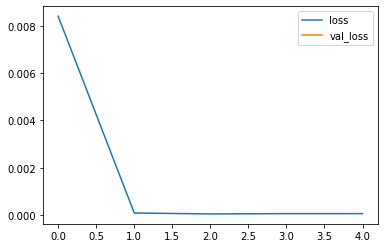

In [6]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [7]:
trainpredictions = model.predict(trainX)
testpredictions = model.predict(testX)

39/39 [==============================] - 0s 1ms/step


In [10]:
print(testpredictions)

[[1.0618892]
 [1.0623161]
 [1.0618154]
 ...
 [1.0154141]
 [1.0149169]
 [1.0155017]]


In [8]:
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Total Percentage Error: ',(abs(Y.sum()-(trainpredictions.sum()+testpredictions.sum()))/Y.sum())*100, '%' )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [12]:
forecastX = np.array([X_forecast], order='C')
forecastX.resize((X_forecast.shape[0], length, features))

In [15]:
forecast_prediction = model.predict(forecastX)
print(forecast_prediction)

1/1 [==============================] - 0s 16ms/step
[[-0.47561243]
 [-0.46959946]
 [-0.46254465]
 [-0.4667968 ]
 [-0.47270092]
 [-0.47065273]
 [-0.46388337]
 [-0.4660871 ]
 [-0.473856  ]
 [-0.4609859 ]
 [-0.46177873]
 [-0.44960707]
 [-0.45365646]
 [-0.45101395]
 [-0.4534978 ]
 [-0.46023405]
 [-0.47045955]
 [-0.4724022 ]
 [-0.47777042]
 [-0.47890696]
 [-0.48871228]
 [-0.4838886 ]
 [-0.47808167]
 [-0.47724167]]
